## Programming Exercise 1 -- Linear Regression
### 1. WarmUpExercise
### 2. Linnear regression with one variable
### 3. Linnear regression with multiple variables 

In [1]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 250)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline  

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

### 1. WarmUpExercise

In [2]:
def warmExercise():
    return np.identity(5)

In [3]:
warmExercise()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

### 2.  Linnear regression with one variable

In [4]:
### Read data1
data1 = np.loadtxt('ex1data1.txt', delimiter=',')
X = data1[:,0]
y = data1[:,1]
m = y.size
# Add x0 = 1 to first column of X
X_new = np.column_stack((np.ones(X.shape[0]), X))
# Transer from 1-D ndarray to matrix !!!
y_new = np.matrix(y).T

#### 2.1 Plotting the Data

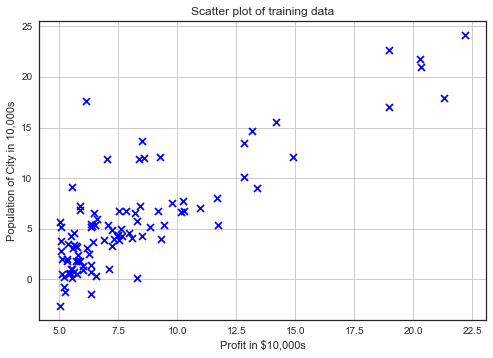

In [5]:
### Scatter plot
# plt.figure(figsize=(8, 6))
plt.scatter(X, y, c='b', marker='x', linewidths=1)
plt.grid(True)
plt.xlabel('Profit in $10,000s')
plt.ylabel('Population of City in 10,000s')
plt.title('Scatter plot of training data')
plt.show()

#### 2.2 Gradient Descent

 The aim of linear regression is to minimize theost function  : $$
\begin{equation*}
J ( \theta ) = \frac{1} {2m} \sum _ {i=1} ^ m ( h _ \theta ( x ^ {(i)} ) - y ^ {(i)} )^2 
\end{equation*}
$$
where hypothesis $h_{\theta}(x)$ is given by the linear model : $$ h_{\theta}(x)=\theta^Tx=\theta_0 + \theta_1x_1 $$
In batch gradient descent, each iteration performs the update simultaneously : $$
\begin{equation*}
\theta _ j = \theta _ j - \alpha \frac{1}{m} \sum _{i=1} ^ m h _{\theta} ( x ^ {(i)} - y ^ {(i)} ) x _ j ^ {(i)}
\end{equation*}
$$



In [6]:
### Compute cost function
def computeCost(X, y, theta):
    return 1/(2*m)*np.sum(np.square(X.dot(theta) - y))

In [7]:
theta0 = np.matrix(np.zeros((2, 1)))
print(computeCost(X_new, y_new, theta0))

32.0727338775


In [8]:
### Gradient descent
def gradientDescent(X, y, theta, alpha=0.01, num_iters=1500):
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        theta = theta - alpha/m*X.T.dot(X.dot(theta)-y)
        J_history[i] = computeCost(X, y, theta)
    return (theta, J_history)
(theta, J_history) = gradientDescent(X_new, y_new, theta0+1)
print('Theta found by gradient descent: ', theta)

Theta found by gradient descent:  [[-3.57081935]
 [ 1.16038773]]


#### 2.3 Visualization

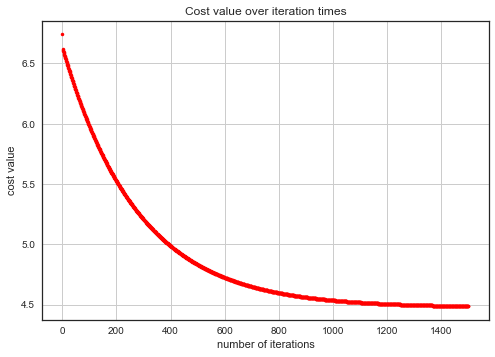

In [9]:
### Visualizing cost value over iteration
# plt.figure(figsize=(10,6))
plt.plot(np.arange(1500)+1, J_history, 'r.')
plt.grid(True)
plt.xlabel('number of iterations')
plt.ylabel('cost value')
plt.title('Cost value over iteration times')
plt.show()

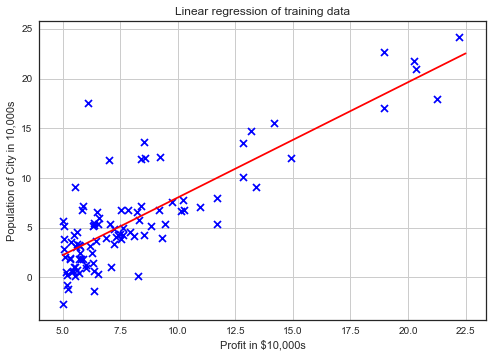

In [10]:
### Plot fitted linear line
theta = np.array(theta)
# plt.figure(figsize=(10,6))
x_input = np.arange(np.floor(X.min()), np.ceil(X.max()),0.5)
y_fitted =theta[0] + x_input*theta[1]
plt.grid(True)
plt.plot(x_input, y_fitted, 'r-',label = 'Hypothesis: h(x) = %0.2f + %0.2fx'%(theta[0],theta[1]))
plt.scatter(X, y, c='b', marker='x', linewidths=1)
plt.xlabel('Profit in $10,000s')
plt.ylabel('Population of City in 10,000s')
plt.title('Linear regression of training data')
plt.show()

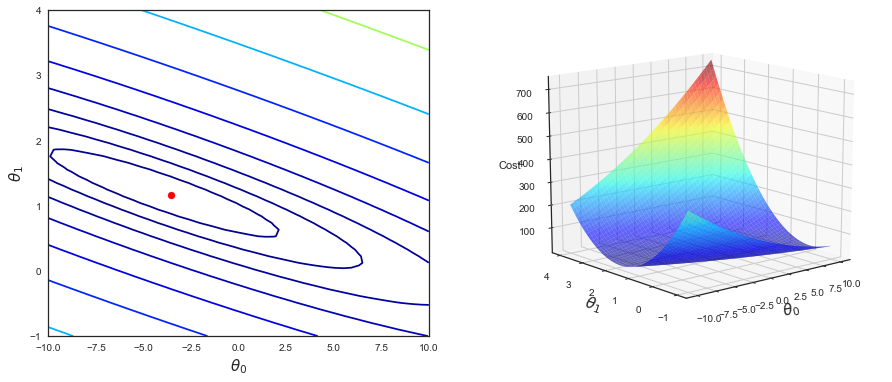

In [11]:
# Create grid coordinates for plotting
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = computeCost(X_new,y_new, theta=[[xx[i,j]], [yy[i,j]]])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=15)
    ax.set_ylabel(r'$\theta_1$', fontsize=15)